## Before submitting
1. Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

2. Make sure that no assertions fail or exceptions occur, otherwise points will be subtracted.

4. Please submit only the `*.ipynb` file.

5. Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE". Edit only between `YOUR CODE HERE` and `END YOUR CODE`.

6. Make sure to use Python 3, not Python 2.

Fill your group name and collaborators below:

In [1]:
GROUPNAME = ""
COLLABORATORS = ""

### Exercise 1.1 Poisson distribution (5 pts)

* Implement Poisson PDF checking all of the input arguments using e.g Python **_assert_** function.

$$\large{
\text{Poisson}(k | \lambda) = \frac{1}{k!}\lambda^{k}\exp{(-\lambda)},\ \text{where}\ k \in \mathbb{N}_0 \ \text{and}\ \lambda \in \mathbb{R}^{+}
}$$

In [23]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
from scipy.special import factorial

def Poisson(k,lambd):
    assert lambd > 0
    assert k >= 0
    assert np.issubdtype(type(k), np.integer)
    return 1/np.math.factorial(k) * lambd**k * np.exp(-lambd)

### Exercise 1.2 (5 pts)

* Depict the Poisson pdf for the given $k$ range and for the given rate values $\lambda$.

Your plot should look like:

<center>
<img src='poisson.png' width=400>

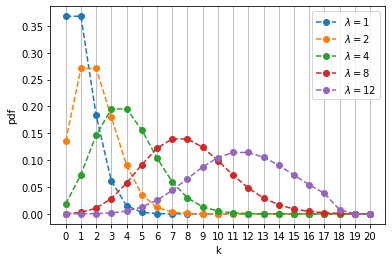

In [25]:
k = np.arange(0,21).astype(np.int)
lambdas = [1,2,4,8,12]
for l in lambdas:
    values = [Poisson(i,l) for i in k]
    plt.plot(k, values, marker="o", linestyle="--", label="$\lambda = {}$".format(l))
plt.grid(axis='x')
plt.xticks(k)
plt.ylabel('pdf')
plt.xlabel('k')
_=plt.legend()

### Exercise 1.3 Exponential family form (5 pts)
<hr>
* Show that the Poisson distribution is in exponential family and can be represented in a form

$$\large{\text{Poisson}(k | \lambda) = p(k | \eta) = h(k)g(\eta)\exp{(\eta^{\top}u(k))}}$$
<br>

$\text{Poisson}(k | \lambda) = \underbrace{\frac{1}{k!}}_{=h(k)}\lambda^k \exp(-\lambda) = h(k) \exp(\underbrace{k}_{=u(k)} \underbrace{\ln(\lambda)}_{=\eta}) \exp(-\lambda) = h(k)\exp(\eta^Tu(k))\underbrace{\exp(-\exp(\eta))}_{=g(\eta)}$

$\large{
\eta = \ln(\lambda)
}$
<br>
$\large{
h(k) = \frac{1}{k!}
}$
<br>
$\large{
g(\eta) = \exp(-\exp(\eta))
}$
<br>
$\large{
u(k) = k
}$

### Exercise 1.4 Higher moments (5 Pts)
<hr>

Given that $\large{k \sim \text{Poisson}(k | \lambda)}$

* Show that $\large{\mathbb{E}[k] = \mathbb{E}[k^2] = \cdots \mathbb{E}[k^N] = \lambda}$ using following property of an exponential family distribution:

<br>
$$\boxed{\large{\mathbb{E}[u^n(k)] = - \triangledown^n_{\eta} \ln{g(\eta)}}}$$

**Proof.** 
$$
    E[u(k)^n] = E[k^n] = - \nabla_{\eta}^n \ln(g(\eta)) = - \nabla_{\ln\lambda}^n \ln(\exp(-\exp \eta)) = - \nabla_{\ln\lambda}^n (- \exp \eta ) = \nabla_{\ln\lambda}^n \exp \eta = \exp \eta = \exp(\ln \lambda) = \lambda.
$$

### Exercise 2.1: Gauss - Gauss conjugacy (5 pts)


* Given that the model distributon is Gaussian with known variance $\large{\sigma^2 = 1}$

$$\large{
p(x_i | \mu, \sigma^2=1) = \mathcal{N}(x_i | \mu, 1) = \frac{1}{\sqrt{2\pi}}\exp{\Big(-\frac{(x_i - \mu)^2}{2}\Big)}
}$$

* Show that the log of the data likelihood $\large{\mathcal{D} = \{x_0,x_1,\dots, x_n \}}$ can be expressed as function of $\large{\mu}$ as following:

<br> 
\begin{align}
p(D|\mu) = \frac{1}{(2\pi)^{\frac{N}{2}}} \exp(-\frac{1}{2}(X-\mu)^T(X-\mu)) = \frac{1}{(2\pi)^{\frac{N}{2}}} \exp(-\frac{1}{2}(X^TX - 2X^T\mu + \mu^T\mu)) &= \frac{1}{(2\pi)^{\frac{N}{2}}} \exp(-\frac{1}{2} \sum_{i=1}^{N} (x_i^2 -2x_i \mu + \mu^2)) \\
&=  \underbrace{\frac{1}{(2\pi)^{\frac{N}{2}}}\exp(-\frac{1}{2}\sum_{i=1}^{N} x_i^2)}_{=\Pi^N_{i=1} h(x_i)} \underbrace{\exp(\sum x_i \mu)}_{=\exp(\mu^T \sum u(x_i))} \underbrace{\exp(-\frac{1}{2}\mu^2)^N}_{=g(\mu)^N}
\end{align}

So, $$
    \ln p(D|\mu) = \ln\left(\Pi h(x_i) g(\mu)^N \exp(\mu^T \sum u(x_i))\right) = \sum \ln(h(x_i)) + N \ln g(\mu) + \mu \sum u(x_i).
   $$
We see that $\sum \ln(h(x_i))$ is the constant. Then,
$$
    \text{const} + N \ln g(\mu) + \mu \sum u(x_i) = \text{const} - \frac{1}{2}N\mu^2 + \mu \sum x_i = -\frac{1}{2}(-2 \sum x_i \mu + N \mu^2) + \text{const}.
$$

$$\large{
\ln{p(D|\mu)} = -\frac{1}{2}\Big(- 2\sum_{i=1}^N x_i\mu  + N\mu^2 \Big) + \text{const}  
}$$

* Where $\large{\text{const}}$ utilizes all of the term which do not depend on $\large{\mu}$ 

### Exercise 2.2: Log posterior form (5 pts)
 
*  Given that prior distribution over mean value $\large{\mu}$ is Gaussian with $\large{\mu_0}$ and variance $\large{\sigma_0^2 = \frac{1}{\tau_0}}$ 

$$\large{
p(\mu \ |\  \mu_0, \sigma^2 = \frac{1}{\tau_0} ) = \mathcal{N}(\mu \  | \ \mu_0, \frac{1}{\tau_0})
}$$

* Show that the log posterior can be expressed as a function of $\large\mu$ in the form:

<br>
\begin{align*}
\ln p(\mu|X,\mu_0,\tau_0) &= \ln p(X|\mu) + \ln(p(\mu|\mu_0,\frac{1}{\tau_0})) + \text{const.}\\
&= - \frac{1}{2}\left( -2 \sum x_i\mu + N \mu^2\right) + \ln \frac{1}{\sqrt{2\pi}}\tau_0 - \frac{1}{2}\tau_0 (\mu-\mu_0)^2 + \text{const.} \\
&= - \frac{1}{2}\left( -2 \sum x_i\mu + N \mu^2\right) - \frac{1}{2}\tau_0 (\mu-\mu_0)^2 + \text{const.} \\
&= - \frac{1}{2}\left( -2 \sum x_i\mu + N \mu^2\right) - \frac{1}{2}\tau_0 (\mu^2-2\mu\mu_0 + \mu_0^2) + \text{const.}\\
&= - \frac{1}{2}\left( -2\sum x_i\mu + N \mu^2 + \tau_0 (\mu^2-2\mu\mu_0 + \mu_0^2)\right)+ \text{const.} \\
&= - \frac{1}{2}\left( -2\sum x_i\mu + N \mu^2 + \tau_0\mu^2-2\tau_0\mu\mu_0 +\tau_0\mu_0^2\right)+ \text{const.} \\
&= - \frac{1}{2}\left( (N +\tau_0)\mu^2 -2\mu(\sum x_i + \tau_0\mu_0) \right)+ \text{const.}
\end{align*} 
<br>
$$\large{
\ln p(\mu |X, \mu_0, \tau_0) = -\frac{1}{2}\Big( (N + \tau_0)\mu^2 -2(\sum_{i=1}^N x_i + \tau_0\mu_0)\mu\Big) + \text{const}
}$$

$\textbf{Note:}\ \boxed{\large{ \ln p(\theta | X) = \ln(X|\theta) + \ln p(\theta) + \text{const}}}$

### Exercise 2.3: Gauss posterior (10 pts)

* Evaluate the posterior in the log-space and show that it's Gaussinan with parameters $\large{\hat{\mu}}$ and $\large{\hat{\sigma}^2}$

<br>
First, we use the square completion trick:
$$
\ln p(\mu | X, \mu_0, \tau_0) - \text{const} = - \frac{1}{2}\left( \underbrace{(N+\tau_0)}_{=a}\mu^2 - 2\mu \underbrace{(\sum x_i + \tau_0 \mu_0)}_{=b} \right) = -\frac{1}{2} \frac{1}{(N+\tau_0)^{-1}} \left(\mu - \frac{\sum x_i + \tau_0 \mu_0}{N + \tau_0}\right)^2 - \frac{(\sum x_i + \tau_0 \mu_0)^2}{N + \tau_0}.
$$
Then,
\begin{align*}
p(\mu | X, \mu_0, \tau_0) = \exp(-\frac{1}{2\underbrace{(N+\tau_0)^{-1}}_{=\hat \sigma^2}} \left(\mu - \underbrace{\frac{\sum x_i + \tau_0 \mu_0}{N + \tau_0}}_{= \hat \mu}\right)^2) \cdot \underbrace{\exp(\frac{(\sum x_i + \tau_0 \mu_0)^2}{2(N + \tau_0)}) \cdot \exp \text{const}}_{= \frac{1}{\sqrt{2\pi \sigma^2}}}
\end{align*}

<br>

$$
\large{p(\mu | \mathcal{D}, \mu_0, \tau_0) = \mathcal{N}(\mu | \hat{\mu}, \hat{\sigma}^2), \quad \text{where} \\ \boxed{\hat{\mu} = \frac{\sum x_i + \tau_0\mu_0}{N + \tau_0} \quad \hat{\sigma}^2 = \frac{1}{N + \tau_0}}
}$$


$\textbf{Hint:}\ $ You may use the square completion trick in order to get the "right" distribution form.

* Square completion:
$$\large{
ax^2 -2bx  = a(x^2 -2 \Big(\frac{b}{a}\Big)x + \Big(\frac{b}{a}\Big)^2 - \Big(\frac{b}{a}\Big)^2) = \frac{(x -  \frac{b}{a})^2}{a^{-1}} + c, \quad c = -\frac{b^2}{a}
}$$

### Exercise 3.1: Toy data generation (5 pts) 

* Generate **20** toy data points $X_{tr}$ from univariate Gaussian distribution with $\large{\mu_{\text{true}} = 5}$ and variance $\large{\sigma^2=1}$

* Depict your generated date as a one-dimensional sample plot and a histogramm with 10 bins.

Your plot should look like:

<center>
<img src='smpl.png' widht=500>

In [ ]:
true_mu = 5
np.random.seed(42)

X_tr = #YOUR CODE HERE

f, axs = plt.subplots(1, 2, sharex=True, figsize = (10,2))

ax = axs[0]
#YOUR CODE HERE

ax.set_xlim(2,8)
ax.set_yticks([])
ax.set_xlabel('X')
ax.set_title('1-dim samples')

ax = axs[1]
#YOUR CODE HERE

ax.set_title('Histogramm')
ax.set_xlabel('X')
ax.set_yticks(np.arange(0,7))
plt.show()

### Exercise 3.2 Posterior PDF (5 pts)

* Implement posterior Gaussian PDF using **_norm_** function from _scipy.stats_ package (already imported).


* Your **post_normal** functions should return computed pdf, mu_hat and sigma2_hat values from the posterior distibution.

In [ ]:
from scipy.stats import norm

def post_normal(X, X_tr, mu_0, tau_0):
    #YOUR CODE HERE

### Exercise 3.3: posterior plot (10 pts)

* Compute the posterior PDF for the given space range. 


* Use empirical mean of the generated data $X_{tr}$ as $\mu_0$ and 1 for precision $\tau_0$ 

* Depict the posterior together with the Bayes estimator and twice the variance area.

Your plot should look like:
<center>
<img src='post.png' width=300>

In [ ]:
space = np.linspace(4.6,5.1,100)
var_space = np.linspace(var_min,var_max,100)

mu_0 = X_tr.mean()
tau_0 = 1

#YOUR CODE HERE

plt.ylim(0,10)
plt.grid(axis='x')
plt.title('Guassian posterior PDF')
_=plt.legend()

<hr>

<br><br><br>
## Bayesian linear regression graphical model

<img src='B_LR.png' width=300>

### Exercise 4.1 Linear regression generative process (10 pts)

* Use $\text{random_state} = 42$ for all of the distributions. 


* Sample $\beta$ parameter from Gamma distibution with $\alpha=1$ and scale = 1 using **gamma** function from _scipy.stats_ package (already imported).


* Compute and store $\beta^{-1}$ value.

In [ ]:
# beta parameter generation

from scipy.stats import multivariate_normal, uniform, norm, gamma

degree = 4
M = degree+1

#YOUR CODE HERE

print(f'beta: {beta:.2f}')
beta_inv = 1./beta
print(f'beta_inv: {beta_inv:.2f}')


* Sample polynomial weights $W \in \mathbb{R}^{M}$ from zero-mean multivariate Gaussian distribution with covariance matrix $\Sigma_0$ using **multivariate_normal** function from _scipy.stats_ package (already imported). Where $M$ is the model complexity equal to polynomial degree + 1. 


* Your covarince matrix is then $\Sigma_0 = \beta^{-1} \mathbb{I}_{M}$

**Note:** Initial degree = 4

In [ ]:
# Polynomial weights generation

#YOUR CODE HERE

print(f"Polynomial weights shape: {W.shape}")
assert W.shape[0] == M

* Generate noise scale value $\sigma$ from Gamma distibution with $\alpha=2$ and scale = 1. Compute and store $\sigma^2$ noise variance value. 

In [ ]:
#YOUR CODE HERE

sigma2  = sigma**2
print(f'sigma2: {sigma2:0.2f}')

assert sigma2 > 5

* Generate $N = 25$ input data points $X \in \mathbb{R}^{N}$ from the uniform distribution in a range between -2 and 4.  Use **uniform** function from *scipy.stats* package.


* Generate $R = 100$ testing data points $Z \in \mathbb{R}^{R}$ as a lin space between -4 and 5.

In [ ]:
N = 25
R = 100

#YOUR CODE HERE

assert X.shape == (N,)
assert Z.shape == (R,)

* Compute $M$ powers of all the input data $X$ and testing data $Z$ and store them in variables called $X_{\text{pow}} \in \mathbb{R}^{N,M}$ and $Z_{\text{pow}} \in \mathbb{R}^{(R,M)} $.  

In [ ]:

#YOUR CODE HERE

assert X_pow.shape == (N,M)
assert Z_pow.shape == (R,M)

* Compute _truth_ function values for all of the testing points $Z$ as $f_{\text{truth}} = Z_{\text{pow}}W$ 


* Sample $N$ output data points from univariate Gaussian using **norm** function with scale = $\sigma$ and mean $\mu = X_{\text{pow}}W $

In [3]:

#YOUR CODE HERE

assert y.shape == (N,)

NameError: name 'y' is not defined

* Depict the sample data and the truth function.

Your plot should look like:
<center>
<img src="data.png" width=300>

In [ ]:
plt.scatter(X, y,label='data')
plt.ylim(-50,100)
plt.xlim(-4,5)
plt.grid()
plt.title("Generated data")
plt.plot(Z,f_truth,'r--', label='groud truth')
_=plt.legend(loc=2)


<br><br><br>


### Exercise 4.2:  Data analysis with Bayesian linear reggression (10 pts)

<hr>

* Load BLR.py file into your notebook in order to get access to _**BayesianLinReg**_ class.


* Understand the functions **_fit_** and **_predict_** from the provided class.


* Note that the constructor expects $c$ values which is a vector used as prior for the covariance matrix diagonals. 

In [ ]:
%run BLR.py # Execute this line in order to load the BayesianLinReg class

* Create an object from the BayesianLinReg class with *degree* = 4, $\ \sigma^2$ equal to the _true_ noise variace value and $c$ values as $M-$dimensional vector of ones. 


* Fit the input data $X$ and the observations $y$ to the class.

In [ ]:
c = np.ones(M)

#YOUR CODE HERE

* Depict the output generated from the Bayes estimated polynomial weights $\hat{W}$ and the input data $X$.

Your plot should look like:

<img src='output.png' width='300'>

In [ ]:
plt.scatter(X, y,label='data')
plt.plot(Z,f_truth,'r--', label='groud truth')
plt.plot(X, y_hat, 'g--',linewidth=3, label='Bayes est '+'$\\hat{y}$')
plt.ylim(-50,100)
plt.xlim(-4,5)
plt.grid()
plt.title('Bayes estimated output')
_=plt.legend()

* Compute the predicted outputs as well as the variance estimators for all of the test data point $Z$ using the _**predict**_ function.

In [ ]:
#YOUR CODE HERE

assert y_pred.shape == (R,)
assert sigma2_y.shape == (R,)

* Depict the predicted values as well as the twice variance region for the predictions.

Your plot should look like:

<img src='predictive.png' widht='400'>

In [ ]:
plt.plot(Z, y_pred,'--', c='g',linewidth=3, label=f'predictive degree: {degree}')
plt.fill_between(Z,y_pred - 2*sigma2_y, y_pred + 2*sigma2_y, color='grey', alpha=.3 , label='twice variance')
plt.scatter(X, y)
plt.plot(Z,f_truth,'r--', label='groud truth')
plt.plot(X, y_hat, 'g--')
plt.ylim(-50,100)
plt.title('Predicted output with the variance regions')
plt.xlim(-4,5)
plt.grid()
_=plt.legend()

### Exercise 4.3 Bayesian model selection (5 pts)

* Perform Bayesian model selection using **_energy_** fuction from the BayesianLinReg class for different polynomial degrees in a range from 1 to 7.


* Store energy values for all of the degrees.


* Find the lowest energy value and the corresponding degree.


* Depict all of the energies.

Your plot should look like:

<img src='nrg.png' width=300>


In [ ]:
degrees = np.arange(1,8)
energies = []
for d in degrees:
    #YOUR CODE HERE

In [ ]:
plt.plot(degrees, energies, 'gs--',label='free nrg')

#YOUR CODE HERE

min_degree = min_idx + 1
plt.title("Bayesian model selection")
plt.axvline(min_degree, color='k', label=f"lowest free nrg: {min_nrg}")
plt.grid(axis='x')
plt.xlabel('polynomial degree')
_=plt.legend()

<br><hr>

## Epirical Bayesian learning (hyperparameter optimization)

### Exercise 5.1 Bayesian free energy as a function of the hyperparameters (5 pts)


* Implement function which computes the Bayesian free energy as a function of the noise variance $\sigma^2$

In [ ]:
def energy_sigma2(sigma2, degree, c):
    
    #YOUR CODE HERE

* Implement function which computes the Bayesian free energy as a function of the covariance matrix diagonals $c$

In [ ]:
def energy_c(c, degree, sigma2):
    
    #YOUR CODE HERE

### Exercise 5.2 Empirical Bayes optimization (5 pts)

* Implement a function which numerically finds the lowes energy as function of noise variance $\sigma^2$ and then as function of covariance diagonals $c$ for the given degree.


* For numeric optimization use **minimize** function from the _scipy.optimize_ package (already imported)


* Your function should perform the optimization, iterativelly, at least 10 times using the best $\sigma^2$ and $c$ estimators from the previous steps.


* Best _BayesianLinReg_ model object is returned.


* Use the L-BFGS-B method for the numerical optimizatio with the bounds (0.01, 100) for all of the variables.


* You may decrease the optimization tolerance to 1e-3

In [ ]:
from scipy.optimize import minimize

def empirical(degree, n_max = 10):
    sigma2_opt=1
    c_opt = np.ones(degree+1)
    for i in range(n_max):
        bnds = ((0.01,100),)
        args = (degree,c_opt)
        res = #YOUR CODE HERE
        
        sigma2_opt = res['x'][0]

        bnds = np.array([[0.01,100]]*(degree+1))
        args = (degree,sigma2_opt)
        res = #YOUR CODE HERE
        c_opt = res['x']
        
    blr = BayesiaLinReg(degree=degree, sigma2=sigma2_opt, c = c_opt)
    return blr

### 5.3 Empirical Bayes model selection

* Perform model selection with the energies after the empirical parameter optimization for the polynomial degrees from 1 to 7.


* Depict the energies collected after the empirical optimizations.

Your plot should look like:

<img src='nrg_emp.png' width=300>

In [ ]:
energies = []
models = []
for d in degrees:
    
    #YOUR CODE HERE

In [ ]:
plt.plot(degrees, energies, 'gs--',label='free nrg')

#YOUR CODE HERE

min_degree = min_idx + 1
plt.title("Bayesian model selection")
plt.axvline(min_degree, color='k', label=f"lowest free nrg: {min_nrg:.2f}")
plt.grid(axis='x')
plt.xlabel('polynomial degree')
_=plt.legend()

* Find the model which gives the lowest Bayes free energy after hyperparameter optimization


* Compute and store the best output predictors $y_{\text{pred}}$ as well as the best output variances $\sigma^2_{y}$.

In [ ]:
#YOUR CODE HERE

* Depict the best predicted values as well as the twice best variance region from the model giving the lowest free energy.

Your plot should look like:

<img src='pred1.png' widht='400'>

In [ ]:
#YOUR CODE HERE

plt.ylim(-50,100)
plt.xlim(-4,5)
plt.grid()
plt.title('Predictive output after emp model selection')
_=plt.legend()

* Print the true and the best estimated noise variance


* Try with higher number of generated data points and see how close you can get the noise variance estimation.

In [ ]:
print(f"True sigma2: {sigma2:0.2f}")
print(f"Estimated sigma2: {best_blr.sigma2:.2f}")